In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
%matplotlib inline
pd.set_option('display.max_rows', 1500)

pd.set_option('display.max_columns',50)

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

*We now concat train and test datasets to process the missing values *

In [3]:
df = pd.concat((train.loc[:,'Id':'SaleCondition'], test.loc[:,'Id':'SaleCondition']), ignore_index= True)

In [4]:
num_col = df.columns[df.dtypes != np.object]
cat_col = df.columns[df.dtypes == np.object]

In [ ]:
df.isnull().sum()[df.isnull().sum() > 0]

From Inspiration of (https://www.kaggle.com/tannercarbonati/house-prices-advanced-regression-techniques/detailed-data-analysis-ensemble-modeling/notebook) I am converting the Na's into with logical values (like mean or mode) 
 

## Data Manipulations:

In [5]:
df.loc[df['MSZoning'].isnull(),['MSZoning','MSSubClass']]

,MSZoning,MSSubClass
1915,NaN,30
2216,NaN,20
2250,NaN,70
2904,NaN,20


In [6]:
pd.crosstab(df['MSZoning'],df['MSSubClass'])

MSSubClass,20,30,40,45,50,60,70,75,80,85,90,120,150,160,180,190
MSZoning,,,,,,,,,,,,,,,,
C (all),3,8,0,0,7,0,4,0,0,0,0,0,0,0,0,3
FV,34,0,0,0,0,43,0,0,0,0,0,19,0,43,0,0
RH,4,2,0,1,2,0,3,0,0,0,4,6,0,0,0,4
RL,1016,61,4,6,159,529,57,9,115,47,92,117,1,21,0,31
RM,20,67,2,11,119,3,63,14,3,1,13,40,0,64,17,23


In [5]:
df.loc[(2216,2904),'MSZoning'] = 'RL'
df.loc[(1915,2250),'MSZoning'] = 'RM'

In [6]:
df['Mod_LotFrontage'] = df['LotFrontage']
ltf = df.loc[df['LotFrontage'].isnull(),['Neighborhood','LotFrontage']]

mean_lotfrontage = dict(df.groupby('Neighborhood')['LotFrontage'].mean())
for i in ltf.index:
    df.loc[i,'Mod_LotFrontage'] = mean_lotfrontage[ltf.loc[i,'Neighborhood']]

df.loc[df['LotFrontage'].isnull(),['Neighborhood','LotFrontage','Mod_LotFrontage']]

df.drop('LotFrontage',1,inplace= True)
df = df.rename(columns={'Mod_LotFrontage': 'LotFrontage'})

In [7]:
bsmt = df.filter(regex = 'Bsmt')
bsmt.loc[bsmt['BsmtFinType1'].isnull(),'BsmtQual'] = 'No Basement'
bsmt.loc[bsmt['BsmtFinType1'].isnull(),'BsmtCond'] = 'No Basement'
bsmt.loc[bsmt['BsmtFinType1'].isnull(),'BsmtExposure'] = 'No Basement'
bsmt.loc[bsmt['BsmtFinType1'].isnull(),'BsmtFinType2'] = 'No Basement'
bsmt.loc[bsmt['BsmtFinType1'].isnull(),'BsmtFinSF1'] = 0
bsmt.loc[bsmt['BsmtFinType1'].isnull(),'BsmtFinSF2'] = 0
bsmt.loc[bsmt['BsmtFinType1'].isnull(),'BsmtUnfSF'] = 0
bsmt.loc[bsmt['BsmtFinType1'].isnull(),'TotalBsmtSF'] = 0
bsmt.loc[bsmt['BsmtFinType1'].isnull(),'BsmtFullBath'] = 0
bsmt.loc[bsmt['BsmtFinType1'].isnull(),'BsmtHalfBath'] = 0

In [8]:
bsmt['BsmtFinType1'].fillna('No Basement',inplace = True)

bsmt[bsmt['BsmtFinType2'].isnull()]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath
332,Gd,TA,No,GLQ,1124.0,NaN,479.0,1603.0,3206.0,1.0,0.0


In [9]:
print bsmt.groupby('BsmtFinType2')['BsmtFinSF2'].mean()
## The "BsmtFinType2" value "ALQ" has the closest mean value for the "BsmtFinSF2", Thus it`s null value is filled with that.
bsmt['BsmtFinType2'].fillna("ALQ", inplace = True)

BsmtFinType2
ALQ            559.500000
BLQ            350.720588
GLQ            723.264706
LwQ            312.873563
No Basement      0.000000
Rec            375.638095
Unf              0.002407
Name: BsmtFinSF2, dtype: float64


In [10]:
bsmt[bsmt['BsmtExposure'].isnull()]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath
948,Gd,TA,NaN,Unf,0.0,Unf,0.0,936.0,936.0,0.0,0.0
1487,Gd,TA,NaN,Unf,0.0,Unf,0.0,1595.0,1595.0,0.0,0.0
2348,Gd,TA,NaN,Unf,0.0,Unf,0.0,725.0,725.0,0.0,0.0


In [10]:
print bsmt.loc[((bsmt['BsmtQual'] == 'Gd') & (bsmt['BsmtCond'] == 'TA') & \
          (bsmt['BsmtFinType1'] == 'Unf') & (bsmt['BsmtFinType2'] == 'Unf')),'BsmtExposure'].value_counts()

bsmt['BsmtExposure'].fillna("No", inplace = True)

No    255
Av     58
Mn     22
Gd     10
Name: BsmtExposure, dtype: int64


In [14]:
bsmt[bsmt['BsmtCond'].isnull()]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath
2040,Gd,NaN,Mn,GLQ,1044.0,Rec,382.0,0.0,1426.0,1.0,0.0
2185,TA,NaN,No,BLQ,1033.0,Unf,0.0,94.0,1127.0,0.0,1.0
2524,TA,NaN,Av,ALQ,755.0,Unf,0.0,240.0,995.0,0.0,0.0


In [11]:
print bsmt.loc[((bsmt['BsmtQual'] == 'Gd') & (bsmt['BsmtExposure'] == 'Mn') & \
          (bsmt['BsmtFinType1'] == 'GLQ') & (bsmt['BsmtFinType2'] == 'Rec')),'BsmtCond'].value_counts()


print bsmt.loc[((bsmt['BsmtQual'] == 'TA') & (bsmt['BsmtExposure'] == 'No') & \
          (bsmt['BsmtFinType1'] == 'BLQ') & (bsmt['BsmtFinType2'] == 'Unf')),'BsmtCond'].value_counts()


print bsmt.loc[((bsmt['BsmtQual'] == 'TA') & (bsmt['BsmtExposure'] == 'Av') & \
          (bsmt['BsmtFinType1'] == 'ALQ') & (bsmt['BsmtFinType2'] == 'Unf')),'BsmtCond'].value_counts()

bsmt['BsmtCond'].fillna("TA", inplace = True)

TA    1
Name: BsmtCond, dtype: int64
TA    121
Fa      7
Gd      2
Name: BsmtCond, dtype: int64
TA    28
Gd     1
Name: BsmtCond, dtype: int64


In [16]:
bsmt[bsmt['BsmtQual'].isnull()]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath
2217,NaN,Fa,No,Unf,0.0,Unf,0.0,173.0,173.0,0.0,0.0
2218,NaN,TA,No,Unf,0.0,Unf,0.0,356.0,356.0,0.0,0.0


In [12]:
print bsmt.loc[((bsmt['BsmtCond'] == 'TA') & (bsmt['BsmtExposure'] == 'No') & \
          (bsmt['BsmtFinType1'] == 'Unf') & (bsmt['BsmtFinType2'] == 'Unf')),'BsmtQual'].value_counts()

print bsmt.loc[((bsmt['BsmtCond'] == 'Fa') & (bsmt['BsmtExposure'] == 'No') & \
          (bsmt['BsmtFinType1'] == 'Unf') & (bsmt['BsmtFinType2'] == 'Unf')),'BsmtQual'].value_counts()

bsmt['BsmtQual'].fillna("TA", inplace = True)

TA    304
Gd    258
Fa     38
Ex     20
Name: BsmtQual, dtype: int64
TA    31
Fa    13
Gd     2
Name: BsmtQual, dtype: int64


In [13]:
df[bsmt.columns] = bsmt

In [14]:
grg = df.filter(regex = "Garage")
grg.loc[grg['GarageType'].isnull(),'GarageCond'] = 'No Garage'
grg.loc[grg['GarageType'].isnull(),'GarageFinish'] = 'No Garage'
grg.loc[grg['GarageType'].isnull(),'GarageQual'] = 'No Garage'
grg.loc[grg['GarageType'].isnull(),'GarageYrBlt'] = 0

In [15]:
grg['GarageType'].fillna('No Garage', inplace = True)

In [17]:
grg[grg['GarageCond'].isnull()]

,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond
2126,Detchd,NaN,NaN,1.0,360.0,NaN,NaN
2576,Detchd,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
print df.loc[(df['GarageType'] == 'Detchd') ,'GarageFinish'].value_counts()
print df.loc[(df['GarageType'] == 'Detchd') ,'GarageQual'].value_counts()
print df.loc[(df['GarageType'] == 'Detchd') ,'GarageCond'].value_counts()
print df.loc[(df['GarageType'] == 'Detchd'),'GarageCars'].median()
print df.loc[(df['GarageType'] == 'Detchd'),'GarageArea'].mean()

Unf    719
RFn     34
Fin     24
Name: GarageFinish, dtype: int64
TA    667
Fa     97
Gd      5
Po      5
Ex      3
Name: GarageQual, dtype: int64
TA    692
Fa     67
Po     12
Ex      3
Gd      3
Name: GarageCond, dtype: int64
2.0
419.492287918


In [16]:
grg.loc[(2126,2576),'GarageFinish'] = 'Unf'
grg.loc[(2126,2576),'GarageQual'] = 'TA'
grg.loc[(2126,2576),'GarageCond'] = "TA"
grg.loc[(2126,2576),'GarageYrBlt'] = df.loc[(2126,2576),'YearBuilt']
grg.loc[2576,'GarageCars'] = grg.loc[(grg['GarageType'] == 'Detchd'),'GarageCars'].median()
grg.loc[2576,'GarageArea'] = grg.loc[(grg['GarageType'] == 'Detchd'),'GarageArea'].mean()

In [17]:
df[grg.columns] = grg

In [25]:
df.loc[df['MasVnrType'].isnull(),['MasVnrArea','MasVnrType']]

,MasVnrArea,MasVnrType
234,NaN,NaN
529,NaN,NaN
650,NaN,NaN
936,NaN,NaN
973,NaN,NaN
977,NaN,NaN
1243,NaN,NaN
1278,NaN,NaN
1691,NaN,NaN
1706,NaN,NaN


In [26]:
print df.groupby('MasVnrType')['MasVnrArea'].median()
print df.groupby('MasVnrType')['MasVnrArea'].count()

MasVnrType
BrkCmn     161.0
BrkFace    203.0
None         0.0
Stone      200.0
Name: MasVnrArea, dtype: float64
MasVnrType
BrkCmn       25
BrkFace     879
None       1742
Stone       249
Name: MasVnrArea, dtype: int64


In [18]:
df['MasVnrArea'].fillna(0,inplace = True)
df.loc[2610,'MasVnrType'] = 'BrkFace'

In [19]:
df['MasVnrType'].fillna("None",inplace = True)

In [29]:
df.loc[df['SaleType'].isnull(),['SaleCondition','SaleType']]

,SaleCondition,SaleType
2489,Normal,NaN


In [20]:
print pd.crosstab(df['SaleType'],df['SaleCondition'])
df['SaleType'].fillna('WD',inplace = True)

SaleCondition  Abnorml  AdjLand  Alloca  Family  Normal  Partial
SaleType                                                        
COD                 46        0       0       2      39        0
CWD                  1        0       0       1      10        0
Con                  0        0       0       0       4        1
ConLD                3        0       0       1      21        1
ConLI                2        0       0       2       5        0
ConLw                0        0       0       1       7        0
New                  0        0       0       0       0      239
Oth                  5        0       0       1       1        0
WD                 133       12      24      38    2314        4


In [31]:
df.loc[(df['MiscFeature'].isnull()) & (df['MiscVal'] != 0),['MiscVal','MiscFeature']]

,MiscVal,MiscFeature
2549,17000,NaN


In [21]:
df.groupby('MiscFeature')['MiscVal'].mean()
# It`s not even close to actual value thus we can modify entire MiscFeature to None

MiscFeature
Gar2    8760.0
Othr    3250.0
Shed     763.8
TenC    2000.0
Name: MiscVal, dtype: float64

In [21]:
df.loc[df['MiscFeature'].isnull(),'MiscVal'] = 0
df['MiscFeature'].fillna('None', inplace = True)

In [22]:
df['Fence'].fillna('No Fence', inplace = True)

In [35]:
df.loc[(df['PoolQC'].isnull()) & (df['PoolArea'] != 0),['PoolArea','PoolQC']]

,PoolArea,PoolQC
2420,368,NaN
2503,444,NaN
2599,561,NaN


In [36]:
df.groupby('PoolQC')['PoolArea'].median()

PoolQC
Ex    370.0
Fa    583.5
Gd    657.0
Name: PoolArea, dtype: float64

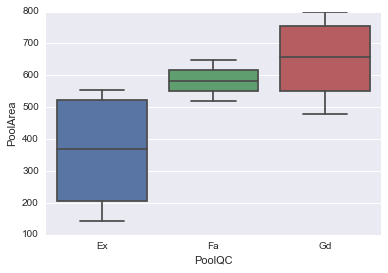

In [37]:
sns.boxplot(x= 'PoolQC', y = 'PoolArea', data = df)

In [23]:
df.loc[(2420,2503),'PoolQC'] = 'Ex'
df.loc[2599,'PoolQC'] = 'Fa'
df["PoolQC"].fillna("No Pool", inplace = True)

In [39]:
df.loc[(df['FireplaceQu'].isnull()) & (df['Fireplaces'] != 0),['Fireplaces','FireplaceQC']]

,Fireplaces,FireplaceQC


In [24]:
df["FireplaceQu"].fillna("No Fireplace", inplace = True)

In [25]:
df["Alley"].fillna("No Alley", inplace = True)

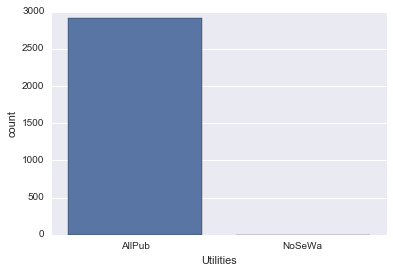

In [26]:
sns.countplot(df['Utilities'])
# Not that useful as except 1 value rest everything is "AllPub" category, Thus dropping this column
df.drop('Utilities',1,inplace = True)

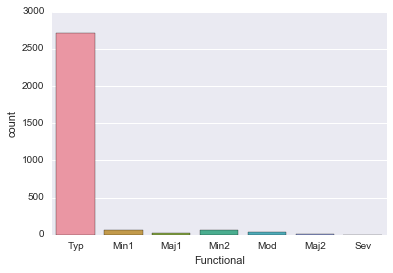

In [27]:
sns.countplot(df['Functional'])
# Filling the Na's with the most common value
df["Functional"].fillna("Typ", inplace = True)

In [28]:
df["Exterior1st"].fillna("VinylSd", inplace = True)
df["Exterior2nd"].fillna("VinylSd", inplace = True)
df["Electrical"].fillna("SBrkr", inplace = True)
df["KitchenQual"].fillna("TA", inplace = True)

In [29]:
df.isnull().sum()[df.isnull().sum() > 0]

Series([], dtype: int64)

## Machine Learning Algorithms:

### Feature Selection:

Now let's change categorical variables into numerical equivalents helpful for SalePrice measurement. 

In [47]:
df.columns

Index([u'Id', u'MSSubClass', u'MSZoning', u'LotArea', u'Street', u'Alley',
       u'LotShape', u'LandContour', u'LotConfig', u'LandSlope',
       u'Neighborhood', u'Condition1', u'Condition2', u'BldgType',
       u'HouseStyle', u'OverallQual', u'OverallCond', u'YearBuilt',
       u'YearRemodAdd', u'RoofStyle', u'RoofMatl', u'Exterior1st',
       u'Exterior2nd', u'MasVnrType', u'MasVnrArea', u'ExterQual',
       u'ExterCond', u'Foundation', u'BsmtQual', u'BsmtCond', u'BsmtExposure',
       u'BsmtFinType1', u'BsmtFinSF1', u'BsmtFinType2', u'BsmtFinSF2',
       u'BsmtUnfSF', u'TotalBsmtSF', u'Heating', u'HeatingQC', u'CentralAir',
       u'Electrical', u'1stFlrSF', u'2ndFlrSF', u'LowQualFinSF', u'GrLivArea',
       u'BsmtFullBath', u'BsmtHalfBath', u'FullBath', u'HalfBath',
       u'BedroomAbvGr', u'KitchenAbvGr', u'KitchenQual', u'TotRmsAbvGrd',
       u'Functional', u'Fireplaces', u'FireplaceQu', u'GarageType',
       u'GarageYrBlt', u'GarageFinish', u'GarageCars', u'GarageArea',
      

In [31]:
train_mod = df.loc[0:1459,]

In [32]:
train_mod['SalePrice'] = train.SalePrice.copy()

C:\Users\vchanumo\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [48]:
num_col

Index([u'Id', u'MSSubClass', u'LotFrontage', u'LotArea', u'OverallQual',
       u'OverallCond', u'YearBuilt', u'YearRemodAdd', u'MasVnrArea',
       u'BsmtFinSF1', u'BsmtFinSF2', u'BsmtUnfSF', u'TotalBsmtSF', u'1stFlrSF',
       u'2ndFlrSF', u'LowQualFinSF', u'GrLivArea', u'BsmtFullBath',
       u'BsmtHalfBath', u'FullBath', u'HalfBath', u'BedroomAbvGr',
       u'KitchenAbvGr', u'TotRmsAbvGrd', u'Fireplaces', u'GarageYrBlt',
       u'GarageCars', u'GarageArea', u'WoodDeckSF', u'OpenPorchSF',
       u'EnclosedPorch', u'3SsnPorch', u'ScreenPorch', u'PoolArea', u'MiscVal',
       u'MoSold', u'YrSold'],
      dtype='object')

In [ ]:
'OverallQual': {'1':1, '2':2, '3':3, '4':4, '5':5, '6':6, '7':7, '8':8, '9':9, '10':10},
'OverallCond': {'1':1, '2':2, '3':3, '4':4, '5':5, '6':6, '7':7, '8':8, '9':9, '10':10},

In [30]:
## Simple Ordinal features

df = df.replace({'ExterQual': {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1},
                 'ExterCond': {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1},
                 'BsmtQual': {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1 ,'No Basement': 0},
                 'BsmtCond': {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1 ,'No Basement': 0},
                 'BsmtExposure': {'Gd':4, 'Av':3, 'Mn':2, 'No':1, 'No Basement':0},
                 'GarageQual': {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1 ,'No Garage': 0},
                 'GarageCond': {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1 ,'No Garage': 0},
                 'HeatingQC': {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1},
                 'KitchenQual': {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1},
                 'FireplaceQu': {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1 ,'No Fireplace': 0},
                 'PoolQC': {'Ex':3, 'Gd':2, 'Fa':1, 'No Pool': 0}})


## Intuitive ordinal Features
df = df.replace({'PavedDrive': {'Y':2,'P':1, 'N':0},
                 'CentralAir': {'Y':1,'N':0},
                 'Street': {'Pave':1,'Grvl':0},
                 'Alley': {'No Alley' : 0,'Grvl' : 1, 'Pave' : 2}})

## Nominal Features
df = df.replace({'Electrical': {"SBrkr":5, "FuseA":4, "FuseF":3, "FuseP":2, "Mix":1},
                 'Functional': {"Typ":7, "Min1":6, "Min2":5, "Mod":4, "Maj1":3, "Maj2":2, "Sev":1},
                 'Fence': {'GdPrv':4,'MnPrv':3, 'GdWo':2, 'MnWw':1, 'No Fence': 0},
                 'MiscFeature': {'None':0, 'Othr':1, 'Shed':2, 'Gar2':2, 'TenC':2},
                 'MSZoning': {'C (all)':0, 'FV':2, 'RH':1, 'RM':1, 'RL':2},
                 'LotShape': {'Reg':1, 'IR1':2, 'IR2':2, 'IR3':2},
                 'LandContour': {'HLS':3, 'Low':2, 'Lvl':1, 'Bnk':1},
                 'LotConfig': {'Inside':1, 'Corner':2, 'CulDSac':3, 'FR2':1, 'FR3':3},
                 'LandSlope': {'Gtl':1, 'Mod':2, 'Sev':3},
                 'BldgType': {'1Fam':3, '2fmCon':1, 'Duplex':2, 'Twnhs':2, 'TwnhsE':3},
                 'HouseStyle': {'1Story':2, '2Story':3, '1.5Fin':2, '1.5Unf':1, '2.5Fin':3, '2.5Unf':2, 'SLvl':2, 'SFoyer':1},
                 'RoofStyle': {'Gambrel':1, 'Gable':1, 'Mansard':1, 'Flat':2, 'Hip':2, 'Shed':2},
                 'RoofMatl': {'CompShg':1, 'Tar&Grv':2, 'WdShake':2, 'WdShngl':2, 'Membran':2, 'ClyTile':1, 'Metal':1, 'Roll':1},
                 'MasVnrType': {'BrkCmn':1, 'BrkFace':2, 'Stone':3, 'None':0},
                 'Foundation': {'PConc':3, 'Wood':2, 'Slab':1, 'Stone':2, 'CBlock':1, 'BrkTil':1},
                 'Heating': {'Floor':1, 'Grav':2, 'Wall':2, 'OthW':3, 'GasW':4, 'GasA':4},
                 'BsmtFinType1': {'No Basement':0, 'Unf':3, 'LwQ':1, 'Rec':1, 'BLQ':1, 'ALQ':2, 'GLQ':4},
                 'BsmtFinType2': {'No Basement':0, 'Unf':2, 'LwQ':1, 'Rec':1, 'BLQ':1, 'ALQ':3, 'GLQ':2},
                 'GarageType': {'No Garage':0, 'CarPort':1, 'Detchd':2, '2Types':3, 'Basment':4, 'Attchd':5, 'BuiltIn':6},
                 'GarageFinish': {'No Garage':0, 'Unf':1, 'RFn':2, 'Fin':3},
                 'SaleType':{'Oth':1, 'ConLD':1, 'ConLw':1, 'COD':1, 'WD':2, 'ConLI':1, 'CWD':2, 'Con':3, 'New':3},
                 'SaleCondition': {'AdjLand':1, 'Abnorml':2, 'Family':2, 'Alloca':3, 'Normal':3, 'Partial':4},
                 'Condition1': {'Artery':1, 'RRAe':1, 'Feedr':1, 'RRAn':2, 'Norm':2, 'RRNe':2, 'RRNn':3, 'PosN':3, 'PosA':3},
                 'Condition2': {'Artery':1, 'RRAe':3, 'Feedr':2, 'RRAn':2, 'Norm':3, 'RRNn':1, 'PosN':4, 'PosA':4},
                 'Exterior1st': {'BrkComm':1, 'AsphShn':1, 'CBlock':1, 'AsbShng':1, 'MetalSd':2, 'Wd Sdng':2, 'WdShing':2, 
                                 'Stucco':2, 'HdBoard':2, 'Plywood':2, 'BrkFace':2, 'VinylSd':3, 'CemntBd':3, 'Stone':3, 
                                 'ImStucc':3},
                 'Exterior2nd': {'CBlock':1, 'AsbShng':1, 'Brk Cmn':1, 'AsphShn':1, 'Wd Sdng':2, 'MetalSd':2, 'Stucco':2,
                                 'Stone':2, 'Wd Shng':2, 'HdBoard':2, 'Plywood':2, 'BrkFace':3, 'VinylSd':3, 'CmentBd':3, 
                                 'ImStucc':3, 'Other':3},
                 'Neighborhood': {'MeadowV':1, 'IDOTRR':1, 'BrDale':1, 'BrkSide':1, 'Edwards':1, 'OldTown':1, 'Sawyer':1, 
                                  'Blueste':1, 'SWISU':2, 'NPkVill':2, 'NAmes':2, 'Mitchel':2, 'SawyerW':2, 'NWAmes':2, 
                                  'Gilbert':2, 'Blmngtn':2, 'CollgCr':2, 'Crawfor':3, 'ClearCr':3, 'Somerst':3, 'Veenker':3, 
                                  'Timber':3, 'StoneBr':4, 'NridgHt':4, 'NoRidge':4}})

In [33]:
df.columns[df.dtypes == np.object]

Index([], dtype='object')

In [31]:
mod_train = df.loc[0:1459,]

In [32]:
mod_train['SalePrice'] = train['SalePrice']

C:\Users\vchanumo\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


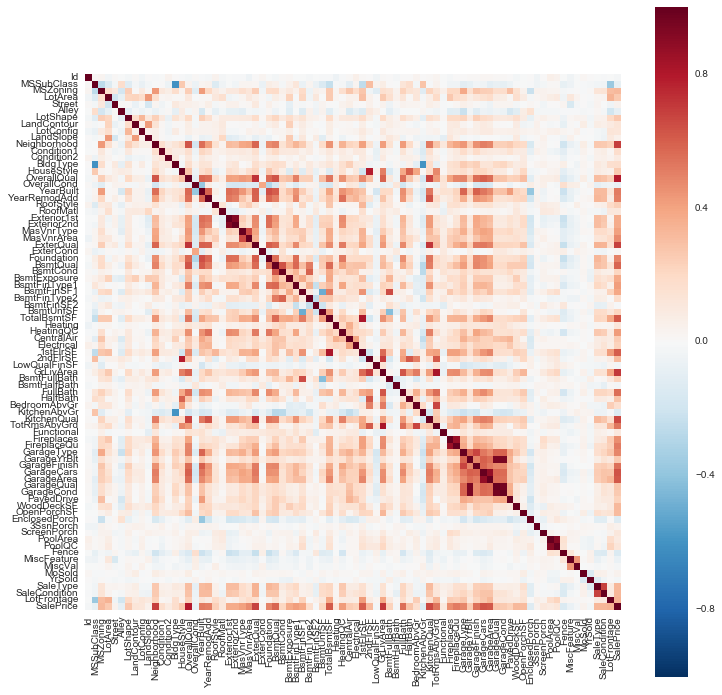

In [34]:
correlation_tab = mod_train.corr()
plt.figure(figsize=(12,12))
sns.heatmap(correlation_tab, vmax=1, square=True)

In [35]:
sale_price_tab = correlation_tab['SalePrice'].to_dict()
del sale_price_tab['SalePrice']
high_cor_tab = {i:sale_price_tab[i] for i in sale_price_tab.keys() if sale_price_tab[i] > 0.4 or sale_price_tab[i] < -0.4}
high_cor_tab

{'1stFlrSF': 0.6058521846919166,
 'BsmtFinType1': 0.41495340351049781,
 'BsmtQual': 0.58520719917251485,
 'ExterQual': 0.68263924165625911,
 'FireplaceQu': 0.52043760595040067,
 'Fireplaces': 0.46692883675152419,
 'Foundation': 0.49829122303224765,
 'FullBath': 0.5606637627484452,
 'GarageArea': 0.62343143891835984,
 'GarageCars': 0.64040919725834899,
 'GarageFinish': 0.5492467563332154,
 'GarageType': 0.48912998736754948,
 'GrLivArea': 0.70862447761265113,
 'HeatingQC': 0.42764870739880489,
 'KitchenQual': 0.65959972072865725,
 'MasVnrArea': 0.47261449900457725,
 'MasVnrType': 0.41179790894133184,
 'Neighborhood': 0.69129841935332448,
 'OverallQual': 0.79098160058380473,
 'TotRmsAbvGrd': 0.53372315558202377,
 'TotalBsmtSF': 0.61358055155919444,
 'YearBuilt': 0.52289733287949669,
 'YearRemodAdd': 0.50710096711138675}

In [36]:
from collections import OrderedDict
order_high_cor_tab = OrderedDict()

keys = sorted(high_cor_tab,key = lambda x: -high_cor_tab[x])
for key in keys:
    order_high_cor_tab[key] = high_cor_tab[key]
order_high_cor_tab
#print keys

OrderedDict([('OverallQual', 0.79098160058380473),
             ('GrLivArea', 0.70862447761265113),
             ('Neighborhood', 0.69129841935332448),
             ('ExterQual', 0.68263924165625911),
             ('KitchenQual', 0.65959972072865725),
             ('GarageCars', 0.64040919725834899),
             ('GarageArea', 0.62343143891835984),
             ('TotalBsmtSF', 0.61358055155919444),
             ('1stFlrSF', 0.6058521846919166),
             ('BsmtQual', 0.58520719917251485),
             ('FullBath', 0.5606637627484452),
             ('GarageFinish', 0.5492467563332154),
             ('TotRmsAbvGrd', 0.53372315558202377),
             ('YearBuilt', 0.52289733287949669),
             ('FireplaceQu', 0.52043760595040067),
             ('YearRemodAdd', 0.50710096711138675),
             ('Foundation', 0.49829122303224765),
             ('GarageType', 0.48912998736754948),
             ('MasVnrArea', 0.47261449900457725),
             ('Fireplaces', 0.46692883675152419),


In [37]:
temp = correlation_tab.ix[keys,keys]
temp[(temp > 0.6) | (temp < -0.6)]

,OverallQual,GrLivArea,Neighborhood,ExterQual,KitchenQual,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,BsmtQual,FullBath,GarageFinish,TotRmsAbvGrd,YearBuilt,FireplaceQu,YearRemodAdd,Foundation,GarageType,MasVnrArea,Fireplaces,HeatingQC,BsmtFinType1,MasVnrType
OverallQual,1.000000,NaN,0.628203,0.726278,0.673331,0.600671,NaN,NaN,NaN,0.629379,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GrLivArea,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.630012,NaN,0.825489,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Neighborhood,0.628203,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ExterQual,0.726278,NaN,NaN,1.000000,0.716122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.608108,NaN,NaN,NaN,NaN,NaN,NaN
KitchenQual,0.673331,NaN,NaN,0.716122,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.625316,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GarageCars,0.600671,NaN,NaN,NaN,NaN,1.000000,0.882475,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GarageArea,NaN,NaN,NaN,NaN,NaN,0.882475,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TotalBsmtSF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00000,0.81953,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1stFlrSF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.81953,1.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BsmtQual,0.629379,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,0.602797,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
mod_columns = ['OverallQual', 'GrLivArea', 'GarageArea', 'TotalBsmtSF', 'GarageFinish', 'YearBuilt', 'FireplaceQU', \
               'YearRemodAdd', 'MasVnrArea', 'HeatingQC', 'BsmtFinType1']

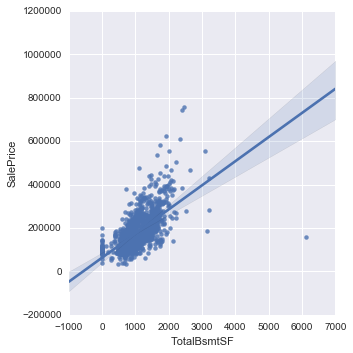

In [45]:
sns.lmplot(x = 'TotalBsmtSF', y = 'SalePrice', data = mod_train)

In [ ]:
#print (train_mod.groupby('SaleCondition')['SalePrice'].mean()).sort_values()
#print train_mod['SaleCondition'].value_counts()
#print df['SaleCondition']

In [ ]:
sns.set(rc={"figure.figsize": (15, 10)},font_scale=1)
f, araxs = plt.subplots(1, 2)

g1= sns.boxplot(x= 'Neighborhood', y= 'SalePrice', data= train_mod, ax= araxs[0], \
                order= train_mod.groupby('Neighborhood')['SalePrice'].mean().sort_values().index)
g2= train_mod.groupby('Neighborhood')['SalePrice'].mean().plot(kind = 'bar')

g1.set_xticklabels(g1.get_xticklabels(), rotation= 45);
g2.set_xticklabels(g2.get_xticklabels(), rotation= 45);

In [ ]:
df['SaleCondition'].value_counts()

In [ ]:
print (train_mod.groupby('SaleCondition')['SalePrice'].mean()).sort_values()
print train_mod['SaleCondition'].value_counts()

In [ ]:
sns.set(rc={"figure.figsize": (12, 5)},font_scale=1)
f, araxs = plt.subplots(1, 2)

g1= sns.boxplot(x= 'RoofMatl', y= 'SalePrice', data= train_mod, ax= araxs[0], \
                order= train_mod.groupby('RoofMatl')['SalePrice'].mean().sort_values().index)
g2= train_mod.groupby('RoofMatl')['SalePrice'].mean().plot(kind = 'bar',)

g1.set_xticklabels(g1.get_xticklabels(), rotation= 45);
g2.set_xticklabels(g2.get_xticklabels(), rotation= 45);

In [ ]:
train_mod['GarageType'].value_counts()

In [ ]:
sns.countplot(df['MiscFeature'])

In [ ]:
sns.boxplot(x = 'MiscFeature', y = 'SalePrice', data = train_mod)

In [ ]:
sns.set(rc={"figure.figsize": (12, 8)},font_scale=1)
f, araxs = plt.subplots(1, 2)

g1= sns.boxplot(x= 'Condition1', y= 'SalePrice', data= train_mod, ax= araxs[0], \
                order= train_mod.groupby('Condition1')['SalePrice'].mean().sort_values().index)
g2= sns.boxplot(x='Condition2', y= 'SalePrice', data= train_mod, ax= araxs[1], \
                order= train_mod.groupby('Condition2')['SalePrice'].mean().sort_values().index)

"""g3= sns.boxplot(x= 'ExterQual', y= 'SalePrice', data= train, ax= araxs[1,0], \
                order= train.groupby('ExterQual')['SalePrice'].mean().sort_values().index)
g4= sns.boxplot(x='ExterCond', y= 'SalePrice', data= train, ax= araxs[1,1], \
                order= train.groupby('ExterCond')['SalePrice'].mean().sort_values().index)"""


g1.set_xticklabels(g1.get_xticklabels(), rotation= 45);
g2.set_xticklabels(g2.get_xticklabels(), rotation= 45);
"""g3.set_xticklabels(g3.get_xticklabels(), rotation= 45);
g4.set_xticklabels(g4.get_xticklabels(), rotation= 45);"""